<a href="https://colab.research.google.com/github/muskan-asudani/Machine-Learning-lab/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Satisfaction Score

Project made by:

*  Muskan Asudani  roll no. 06
*  Aditya Shukla roll no. 42


                

The Customer Feedback and Satisfaction Dataset is a  dataset designed to analyze and predict customer satisfaction based on various demographic and behavioral factors. It contains data for 38,444 customers, capturing their feedback on products and services in a structured format.

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns   #visualisation
import matplotlib.pyplot as plt    #visualisation
%matplotlib inline
#to display the plots immediatedly below the code
sns.set(color_codes=True)
#to enable us to use shorthand color codes

## Load dataset

Here the data was downloaded from kaggle and uploaded from the device.

In [ ]:
data=pd.read_csv('customer_feedback_satisfaction.csv')

## Exploratory data analysis

In [ ]:
data.shape

(38444, 11)

In [ ]:
data.describe() #all the details about the dataset

,CustomerID,Age,Income,ProductQuality,ServiceQuality,PurchaseFrequency,SatisfactionScore
count,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000
mean,19222.500000,43.496853,75076.619238,5.494746,5.492769,10.453881,85.276409
std,11097.971211,14.972748,25975.752966,2.873192,2.875812,5.765621,16.898577
min,1.000000,18.000000,30001.000000,1.000000,1.000000,1.000000,4.280000
25%,9611.750000,31.000000,52624.500000,3.000000,3.000000,5.000000,74.470000
50%,19222.500000,43.000000,75236.000000,5.000000,5.000000,10.000000,91.270000
75%,28833.250000,56.000000,97606.750000,8.000000,8.000000,15.000000,100.000000
max,38444.000000,69.000000,119999.000000,10.000000,10.000000,20.000000,100.000000


In [ ]:
data.head() #to show the first five entries in the dataset

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0


In [ ]:
data.tail() #to show the last entries in the dataset  default=5

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
38439,38440,55,Female,USA,80880,6,3,14,High,Silver,75.85
38440,38441,44,Male,Canada,42845,5,10,1,Low,Silver,100.00
38441,38442,43,Female,USA,71433,7,9,7,Medium,Bronze,100.00
38442,38443,28,Female,USA,105587,7,5,16,High,Silver,100.00
38443,38444,64,Female,Canada,105379,2,2,8,High,Bronze,71.81


In [ ]:
data.dtypes #check the types of data present

,0
CustomerID,int64
Age,int64
Gender,object
Country,object
Income,int64
ProductQuality,int64
ServiceQuality,int64
PurchaseFrequency,int64
FeedbackScore,object
LoyaltyLevel,object


In [ ]:
data.values

array([[1, 56, 'Male', ..., 'Low', 'Bronze', 100.0],
       [2, 69, 'Male', ..., 'Medium', 'Gold', 100.0],
       [3, 46, 'Female', ..., 'Medium', 'Silver', 100.0],
       ...,
       [38442, 43, 'Female', ..., 'Medium', 'Bronze', 100.0],
       [38443, 28, 'Female', ..., 'High', 'Silver', 100.0],
       [38444, 64, 'Female', ..., 'High', 'Bronze', 71.81]], dtype=object)

## Data Preprocessing

**Dropping irrelevant columns**

In [ ]:
data=data.drop(['CustomerID'],axis=1)  #dropping the customer id column here because it won't factor in for the prediction #axis=1 implies we are dropping a coloumn
data.head()

,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,60,Male,UK,97546,6,4,13,Low,Bronze,82.0


**Renaming the rows**

In [ ]:
#this can be used to give the columns short alternative names so they are easier to access
data=data.rename(columns={'SatisfactionScore':'SS'})
data.head()

,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SS
0,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,60,Male,UK,97546,6,4,13,Low,Bronze,82.0


**Dropping duplicate rows**

In [ ]:
if data.duplicated().any():
  data=data.drop_duplicates()

**Dropping null values**

data.isna(): Returns a DataFrame of the same shape as data, with True indicating the presence of a NaN in each cell.

data.isna().any(): For each column, it checks if there are any True values (i.e., any NaN values). This results in a Series where each entry is True if the column contains at least one NaN.

data.isna().any().any(): The second .any() checks across the entire Series of columns, returning True if any column has at least one missing value. Essentially, this checks if there's any missing value in the entire DataFrame.

data.dropna(): If any missing value is found, dropna() is called to remove all rows containing NaNs.

In [ ]:
if data.isna().any().any():
  data=data.dropna()

**OR Run this to see what each function does**

In [ ]:
#data.isna()

In [ ]:
#data.isna().any()

In [ ]:
#na=data.isna().any().any()

In [ ]:
#if na:
  #data = data.dropna()

**Classifying the data**

Linear Regression requires numeric inputs

Import necessary library

In [46]:
from sklearn.preprocessing import OneHotEncoder

Encodeing the Gender Column

In [48]:
# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for array output

# Fit the encoder to the 'Gender' column
encoder.fit(data[['Gender']])  # Assuming your DataFrame is named 'data'

# Transform the 'Gender' column
encoded_gender = encoder.transform(data[['Gender']])

# Create new columns from the encoded data
gender_df = pd.DataFrame(encoded_gender, columns=encoder.get_feature_names_out(['Gender']))

# Concatenate the encoded columns with the original DataFrame
data = pd.concat([data, gender_df], axis=1)

# Drop the original 'Gender' column
data = data.drop('Gender', axis=1)

Encoding the Country column

In [49]:
# Create a OneHotEncoder object
encoder_country = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder to the 'Country' column
encoder_country.fit(data[['Country']])

# Transform the 'Country' column
encoded_country = encoder_country.transform(data[['Country']])

# Create new columns from the encoded data
country_df = pd.DataFrame(encoded_country, columns=encoder_country.get_feature_names_out(['Country']))

# Concatenate the encoded columns with the original DataFrame
data = pd.concat([data, country_df], axis=1)

# Drop the original 'Country' column
data = data.drop('Country', axis=1)

In [50]:
feedback_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Apply the mapping to the 'FeedbackScore' column
data['FeedbackScore'] = data['FeedbackScore'].map(feedback_mapping)

In [52]:
loyalty_mapping={'Gold':3,'Silver':2,'Bronze':1}
data['LoyaltyLevel']=data['LoyaltyLevel'].map(loyalty_mapping)

## Data Visualisation

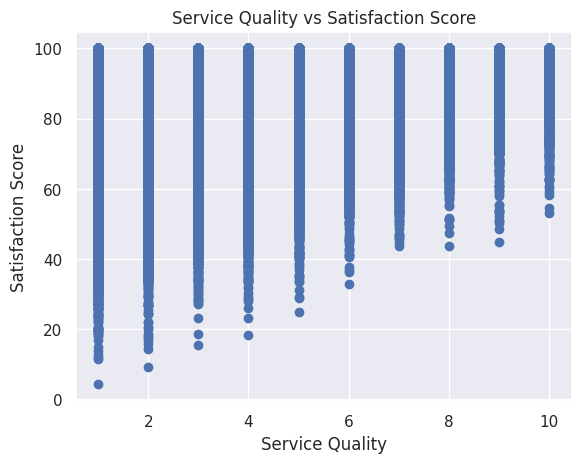

In [53]:
plt.scatter(data['ServiceQuality'], data['SS'])  # Create scatter plot
plt.xlabel('Service Quality')  # Set x-axis label
plt.ylabel('Satisfaction Score')  # Set y-axis label
plt.title('Service Quality vs Satisfaction Score')  # Set plot title
plt.show()  # Display the plot

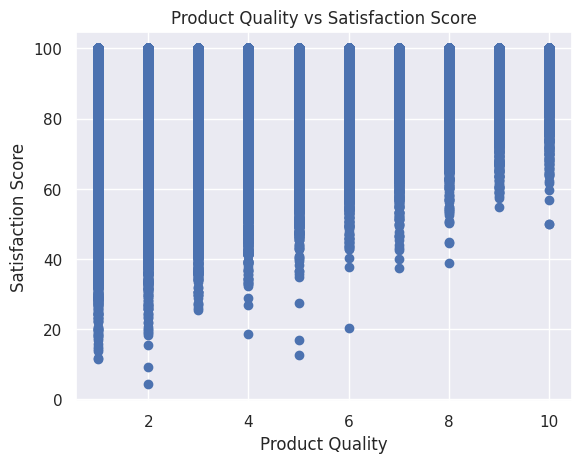

In [35]:
plt.scatter(data['ProductQuality'], data['SS'])  # Create scatter plot
plt.xlabel('Product Quality')  # Set x-axis label
plt.ylabel('Satisfaction Score')  # Set y-axis label
plt.title('Product Quality vs Satisfaction Score')  # Set plot title
plt.show()  # Display the plot

## Test-Train-Split

**This function randomly splits the data into the desired proportions (e.g., 80% for training, 20% for testing).**

In [54]:
#importing necessary modules and functions
from sklearn.model_selection import train_test_split

In [55]:
# Features and target variable
x = data.drop('SS', axis=1) #enter target variable here and in the code below
y = data['SS']


In [56]:
## Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)
x_train.count(),x_test.count(),y_train.count(),y_test.count()

(Age                  30755
 Income               30755
 ProductQuality       30755
 ServiceQuality       30755
 PurchaseFrequency    30755
 FeedbackScore        30755
 LoyaltyLevel         30755
 Gender_Female        30755
 Gender_Male          30755
 Country_Canada       30755
 Country_France       30755
 Country_Germany      30755
 Country_UK           30755
 Country_USA          30755
 dtype: int64,
 Age                  7689
 Income               7689
 ProductQuality       7689
 ServiceQuality       7689
 PurchaseFrequency    7689
 FeedbackScore        7689
 LoyaltyLevel         7689
 Gender_Female        7689
 Gender_Male          7689
 Country_Canada       7689
 Country_France       7689
 Country_Germany      7689
 Country_UK           7689
 Country_USA          7689
 dtype: int64,
 30755,
 7689)

In [57]:
x_train.head(),y_train.head()

(       Age  Income  ProductQuality  ServiceQuality  PurchaseFrequency  \
 33129   69   65469               4               9                  6   
 22687   36  119566               2               7                  5   
 2074    19   50329              10               8                  2   
 13678   23   96073               1               5                 17   
 19519   47   95023               6               1                  4   
 
        FeedbackScore  LoyaltyLevel  Gender_Female  Gender_Male  \
 33129              3             2            0.0          1.0   
 22687              2             1            1.0          0.0   
 2074               3             3            1.0          0.0   
 13678              2             1            1.0          0.0   
 19519              3             1            1.0          0.0   
 
        Country_Canada  Country_France  Country_Germany  Country_UK  \
 33129             0.0             0.0              0.0         0.0   
 22687  

## ModelTraining

Importing libraries

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

**Linear Regression**

In [81]:
modellr = LinearRegression()  # Create a Linear Regression object
modellr.fit(x_train, y_train)  # Train the model

LinearRegression()

**Decision Tree Regression**

In [75]:
modeldt = DecisionTreeRegressor()
modeldt.fit(x_train, y_train)

DecisionTreeRegressor()

**Random Forest Regression**

In [79]:
modelrf = RandomForestRegressor()
modelrf.fit(x_train, y_train)

RandomForestRegressor()

**Support Vector Regression (SVR)**

In [78]:
modelsvr = SVR()
modelsvr.fit(x_train, y_train)

SVR()

## Model Testing

In [67]:
from sklearn import metrics

In [82]:
# Make predictions on the test data
y_pred_lr = modellr.predict(x_test)
y_pred_dt = modeldt.predict(x_test)
y_pred_rt = modelrf.predict(x_test)
y_pred_svr = modelsvr.predict(x_test)

In [83]:
print(f'Linear Regression prediction: {y_pred_lr}')
print(f'Decision Tree Regression prediction: {y_pred_dt}')
print(f'Random Forest Regression prediction: {y_pred_rt}')
print(f'Support Vector Regression prediction: {y_pred_svr}')

Linear Regression prediction: [105.671843    86.063784    77.74472754 ...  73.53181286  88.62233827
  95.38451765]
Decision Tree Regression prediction: [100.    86.6   70.97 ...  73.87  88.04  95.85]
Random Forest Regression prediction: [99.8828 87.5667 78.9846 ... 72.123  90.6197 96.9556]
Support Vector Regression prediction: [93.95620752 99.76824577 89.25483334 ... 82.73694552 92.23613417
 85.3149631 ]


In [63]:
print(y_test)

31685    100.00
15551     83.99
30549     70.36
38390     66.56
37760     68.25
          ...  
18194    100.00
10926     80.70
28382     80.98
28859     99.41
30550     93.49
Name: SS, Length: 7689, dtype: float64


Cross-Validation

In [65]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.70006112 0.69403474 0.70048283 0.7029908  0.70197428]
Average cross-validation score: 0.6999087564717273


Mean-squared-error

In [99]:
from sklearn.metrics import mean_squared_error, r2_score
mse1 = mean_squared_error(y_test, y_pred_lr)  # Calculate Mean Squared Error for linear regression
r2_1 = r2_score(y_test, y_pred_lr)  # Calculate R-squared

mse2 = mean_squared_error(y_test, y_pred_dt)  # Calculate Mean Squared Error for decision tree regression
r2_2 = r2_score(y_test, y_pred_dt)  # Calculate R-squared

mse3 = mean_squared_error(y_test, y_pred_rt)  # Calculate Mean Squared Error for random forest regression
r2_3 = r2_score(y_test, y_pred_rt)  # Calculate R-squared

mse4 = mean_squared_error(y_test, y_pred_svr)  # Calculate Mean Squared Error for Support vector regression
r2_4 = r2_score(y_test, y_pred_svr)  # Calculate R-squared


mse={'Linear Regression':mse1,'Decision Tree Regression':mse2,'Random Forest Regression':mse3,'Support Vector Regression':mse4}

r2_score={'Linear Regression':r2_1,'Decision Tree Regression':r2_2,'Random Forest Regression':r2_3,'Support Vector Regression':r2_4}

print(mean_squared_error)
for key, value in mse.items():
    print(f"{key}: {value}")

print('\nr2_score: ')
for key, value in r2_score.items():
  print(key , value)

<function mean_squared_error at 0x7b00711883a0>
Linear Regression: 84.50584134930574
Decision Tree Regression: 126.68985693848354
Random Forest Regression: 64.5133989606971
Support Vector Regression: 303.93534853610805

r2_score: 
Linear Regression 0.7030262672123858
Decision Tree Regression 0.55478154976491
Random Forest Regression 0.7732844901811962
Support Vector Regression -0.06810148907669666


##Hyperparameter Tuning

Best Model: The model with the lowest MSE and the highest R2 is generally considered the best-performing model for regression tasks.

We chose the random forest regressor model and linear regression here.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit to training data
grid_search.fit(x_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_
print(best_rf_model)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Define the model
model = LinearRegression()

# Define the hyperparameter grid
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit to training data
grid_search.fit(X_train, y_train)

# Get the best model
best_linear_model = grid_search.best_estimator_
print(best_linear_model)